<a href="https://colab.research.google.com/github/garguday672004/Clustering-Using-PyCaret/blob/main/Copy_of_Clustering_Assignment_(Using_Spectral_Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4428805%2F7606635%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240211%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240211T175542Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D1ea662ef8186e5baddbfd7f7bdaa4d295344255d45146fa67853848c03a1db66255b2e4ca1285baed865add636c78862a2a930571b148301616b866e5af47b99a5917edac484803839da02bbed90b5e56c706876b0f475e7226da6f84758b328e1400111687cb28cf7a8436abde47d4330fda060ae689d966868974da12ffbd49083a4dbebee716f525fa69157b1b8534d5fbbb037a360bb946fb9bc290309f0ee6631b66b15eae28bbaaa5e6fed2a045b4eee1976b95b1b63b30bdb35dfef198246a4c42b294c37c19e5933999d5ec8829b72f0d939c53400357a6a2b2de0a5bd6b5d243398c1dcc5c4173cb4827729fd9c20e9102207db2dce5066ec6d14e3'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 7017 bytes downloaded
Downloaded and uncompressed: dataset
Data source import complete.


In [19]:
import pandas as pd
file_path = '/kaggle/input/dataset/Wholesale customers data.csv'
df = pd.read_csv(file_path)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [20]:
df_target = df.Region
features = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
DataSet = df[features]
DataSet.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [21]:
# installing pycaret
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [22]:
# getting its version
from pycaret.utils import version
version()

'3.2.0'

In [23]:
from pycaret.datasets import get_data
from pycaret.clustering import *

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.3944,0.6565,5.9008,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

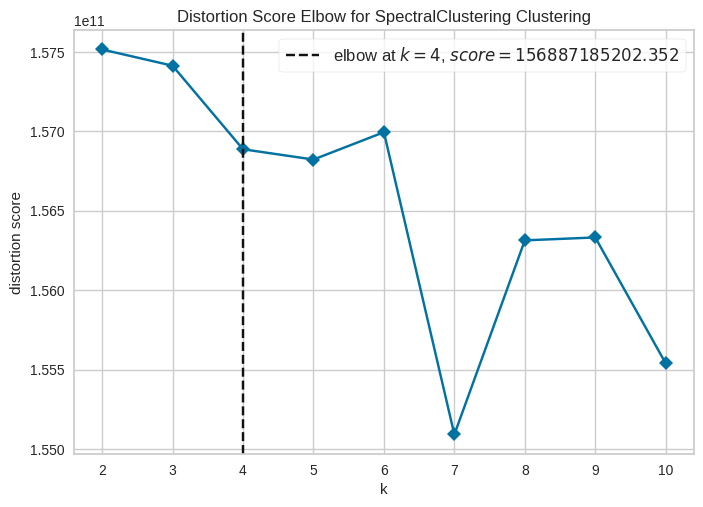

for clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1942,0.2535,11.7072,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.3944,0.6565,5.9008,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.3337,0.5363,6.0476,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [24]:
# Case 1 : No Data Processing
kMeanClusteringParameters = setup(DataSet,verbose = False)
x = create_model('sc')
plot_model(x, plot='elbow')

print("for clusters = 3")
KMeanClusteringModel = create_model('sc', num_clusters=3)

print("for clusters = 4")
KMeanClusteringModel = create_model('sc', num_clusters=4)

print("for clusters = 5")
KMeanClusteringModel = create_model('sc', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8638,67.5123,0.0927,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

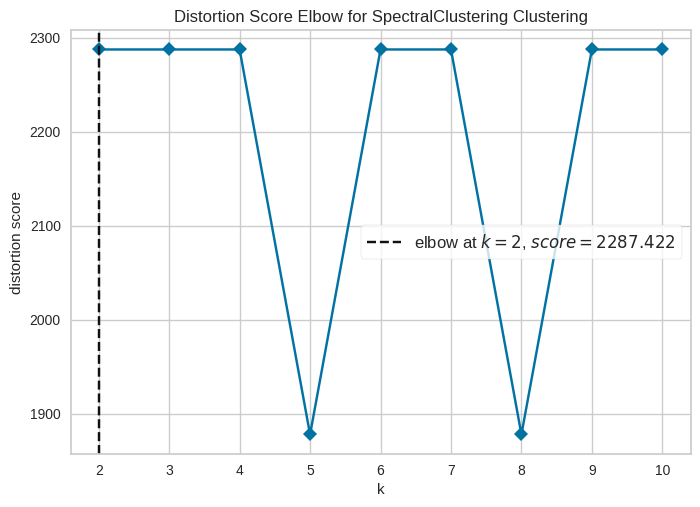

for clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8638,67.5123,0.0927,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8638,67.5123,0.0927,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7686,88.6735,0.3858,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [25]:
# Case 1 : Using Normalization
setup(DataSet,normalize = True, normalize_method = 'zscore', verbose = False)
x = create_model('sc')
plot_model(x, plot='elbow')

print("for clusters = 3")
KMeanClusteringModel = create_model('sc', num_clusters=3)

print("for clusters = 4")
KMeanClusteringModel = create_model('sc', num_clusters=4)

print("for clusters = 5")
KMeanClusteringModel = create_model('sc', num_clusters=5)

In [17]:
# Case 3 : Using Transformation
setup(DataSet,transformation = True, transformation_method = 'yeo-johnson', verbose = False)
x = create_model('sc')
# plot_model(x, plot='elbow')

print("for clusters = 3")
KMeanClusteringModel = create_model('sc', num_clusters=3)

print("for clusters = 4")
KMeanClusteringModel = create_model('sc', num_clusters=4)

print("for clusters = 5")
KMeanClusteringModel = create_model('sc', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5933,10.7120,0.2617,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5933,10.7120,0.2617,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5933,10.7120,0.2617,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5933,10.7120,0.2617,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [26]:
# Case 4 : Using PCA
setup(DataSet,pca = True, pca_method = 'linear',verbose = False)
x = create_model('sc')
# plot_model(x, plot='elbow')

print("for clusters = 3")
KMeanClusteringModel = create_model('sc', num_clusters=3)

print("for clusters = 4")
KMeanClusteringModel = create_model('sc', num_clusters=4)

print("for clusters = 5")
KMeanClusteringModel = create_model('sc', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1585,1.2492,10.5368,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1087,0.8098,8.3910,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1585,1.2492,10.5368,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1147,0.3456,14.9036,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [27]:
# Case 5 : Using Transformation and Normalization
setup(DataSet,transformation = True, transformation_method = 'yeo-johnson', normalize = True, normalize_method = 'zscore', verbose = False)
x = create_model('sc')
# plot_model(x, plot='elbow')

print("for clusters = 3")
KMeanClusteringModel = create_model('sc', num_clusters=3)

print("for clusters = 4")
KMeanClusteringModel = create_model('sc', num_clusters=4)

print("for clusters = 5")
KMeanClusteringModel = create_model('sc', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1035,43.4639,2.2482,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2593,141.1609,1.2905,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1035,43.4639,2.2482,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0890,41.2907,1.8817,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [28]:
# Case 6: Using T + N + PCA
setup(DataSet,pca = True, pca_method = 'linear',transformation = True, transformation_method = 'yeo-johnson',normalize = True, normalize_method = 'zscore',verbose = False)
x = create_model('sc')
# plot_model(x, plot='elbow')

print("for clusters = 3")
KMeanClusteringModel = create_model('sc', num_clusters=3)

print("for clusters = 4")
KMeanClusteringModel = create_model('sc', num_clusters=4)

print("for clusters = 5")
KMeanClusteringModel = create_model('sc', num_clusters=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0923,41.5276,2.2173,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2593,141.1609,1.2905,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0923,41.5276,2.2173,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 5


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0883,41.0674,1.8786,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [30]:
setup(DataSet,normalize = True, normalize_method = 'zscore', verbose = False)

print("for clusters = 3")
KMeanClusteringModel = create_model('sc', num_clusters=3)
plot_model(x, plot='tsne')

print("for clusters = 4")
KMeanClusteringModel = create_model('sc', num_clusters=4)
plot_model(x, plot='tsne')

# Result --> In ocmparison to ither clustering methods this method is extremely poor in clustering the dataset

for clusters = 3


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7686,88.6735,0.3858,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

for clusters = 4


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6692,53.6626,0.8513,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]